This notebook will be used to give templates for plotting various types of plots predominantly for matplotlib. This means that for other plots and applications, we can use this notebook as a platform to quickly take code needed to make plots we need.

In [1]:
%matplotlib inline

# Imports

In [2]:
import os
import matplotlib.pyplot as plt
os.chdir("../../coding_data/cookbook_data/")
os.getcwd()

"C:\\Users\\k2035549\\OneDrive - King's College London\\Desktop\\Coding\\coding_data\\cookbook_data"

### Read data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

meetup = pd.read_csv('data/meetup_groups.csv',
    parse_dates=['join_date'], # change column to timestamp
    index_col='join_date')

employee = pd.read_csv('data/employee.csv',
    parse_dates=['HIRE_DATE', 'JOB_DATE'])

dia = pd.read_csv('data/diamonds.csv')

fueleco = pd.read_csv('data/vehicles.csv.zip')

C:\Users\Public\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Altering plotting objects

### Example 1: Basic graphs

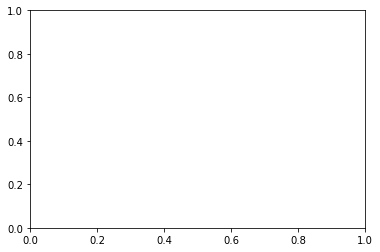

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1)

Changing size of graph

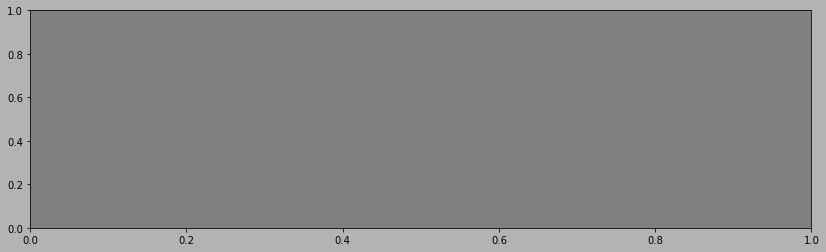

In [12]:
fig.set_size_inches(14, 4)

fig.set_facecolor('.7')
ax.set_facecolor('.5')
fig

Changing spines on axes

OrderedDict([('left', <matplotlib.spines.Spine object at 0x000001D4F85890A0>), ('right', <matplotlib.spines.Spine object at 0x000001D4F8573A60>), ('bottom', <matplotlib.spines.Spine object at 0x000001D4F85736A0>), ('top', <matplotlib.spines.Spine object at 0x000001D4F855ACA0>)])


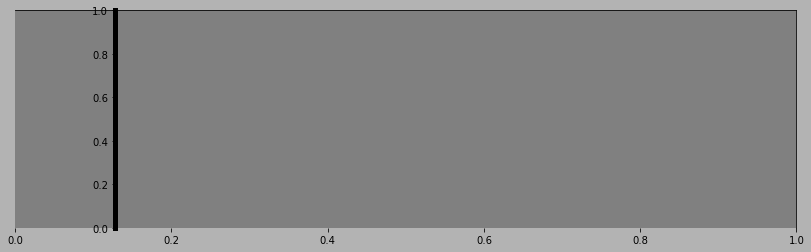

In [14]:
spines = ax.spines
print(spines)

spine_left = spines['left']
spine_left.set_position(('outward', -100))
spine_left.set_linewidth(5)
spine_bottom = spines['bottom']
spine_bottom.set_visible(False)
fig

Changing axis' on graph

[Text(0, 0, 'point 1'), Text(0, 0, 'point 9')]

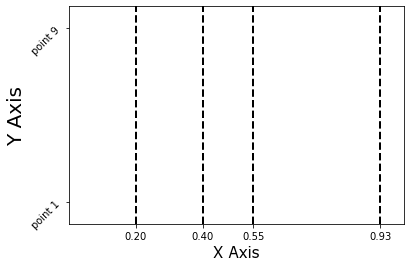

In [22]:
# create figure and axes
fig, ax = plt.subplots(nrows=1, ncols=1)

# changes axis as required

ax.xaxis.grid(True, which='major', linewidth=2, # True part is adding gridlines, which is choosing major ticks to have gridlines
    color='black', linestyle='--') # gives linewidth and style of x ticks
ax.xaxis.set_ticks([.2, .4, .55, .93])
ax.xaxis.set_label_text('X Axis', family='Verdana',
    fontsize=15)
ax.set_ylabel('Y Axis', family='Gotham', fontsize=20)
ax.set_yticks([.1, .9])
ax.set_yticklabels(['point 1', 'point 9'], rotation=45)

In [ ]:
# Setting mulyiple plots on same axis

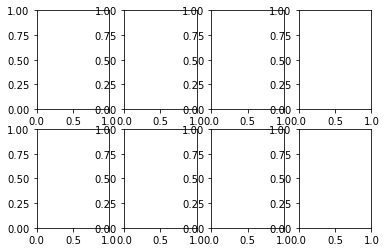

In [19]:
fig, axs = plt.subplots(2, 4)

In [20]:
axs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D4F8614DC0>,
      dtype=object)

### Example 2: Plotting snowfall

Load data required for snowfall data

In [7]:
import pandas as pd
import numpy as np
# import data
alta = pd.read_csv('data/alta-noaa-1980-2019.csv')
# filter data for 2018-2019 season
data = (alta
    .assign(DATE=pd.to_datetime(alta.DATE))
    .set_index('DATE')
    .loc['2018-09':'2019-08']
    .SNWD
)

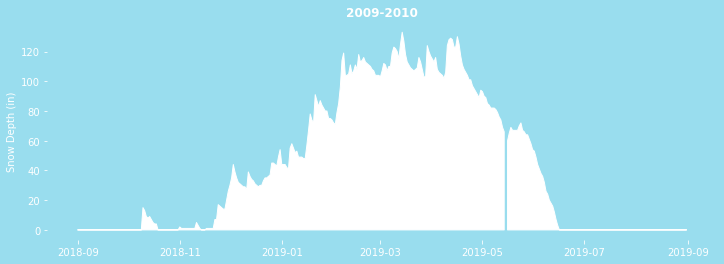

In [12]:
# set blue and white code
blue = '#99ddee'
white = '#ffffff'

# set figure and axes object using subplot
fig, ax = plt.subplots(figsize=(12,4), 
     linewidth=5, facecolor=blue)
ax.set_facecolor(blue)

# make spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# make ticks white
ax.tick_params(axis='x', colors=white)
ax.tick_params(axis='y', colors=white)

# set axis labels
ax.set_ylabel('Snow Depth (in)', color=white)
ax.set_title('2009-2010', color=white, fontweight='bold')

# actually plot the graph (white part)
ax.fill_between(data.index, data, color=white)
# fig.savefig('c13-alta1.png', dpi=300, facecolor=blue)  

# Multiple sketches

### Example 1: Plot snowfall for multiple seasons

In [16]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdt
alta = pd.read_csv('data/alta-noaa-1980-2019.csv')
alta.head(3)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DASF,MDPR,MDSF,...,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11
0,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-01,NaN,NaN,NaN,NaN,...,29.0,38.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-02,NaN,NaN,NaN,NaN,...,34.0,27.0,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-03,NaN,NaN,NaN,NaN,...,30.0,27.0,12.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN


 function to plot graph

In [14]:
def plot_year(ax, data, years):
    ax.set_facecolor(blue)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis='x', colors=white)
    ax.tick_params(axis='y', colors=white)
    ax.set_ylabel('Snow Depth (in)', color=white)
    ax.set_title(years, color=white, fontweight='bold')
    ax.fill_between(data.index, data, color=white)

plot multiple graphs 

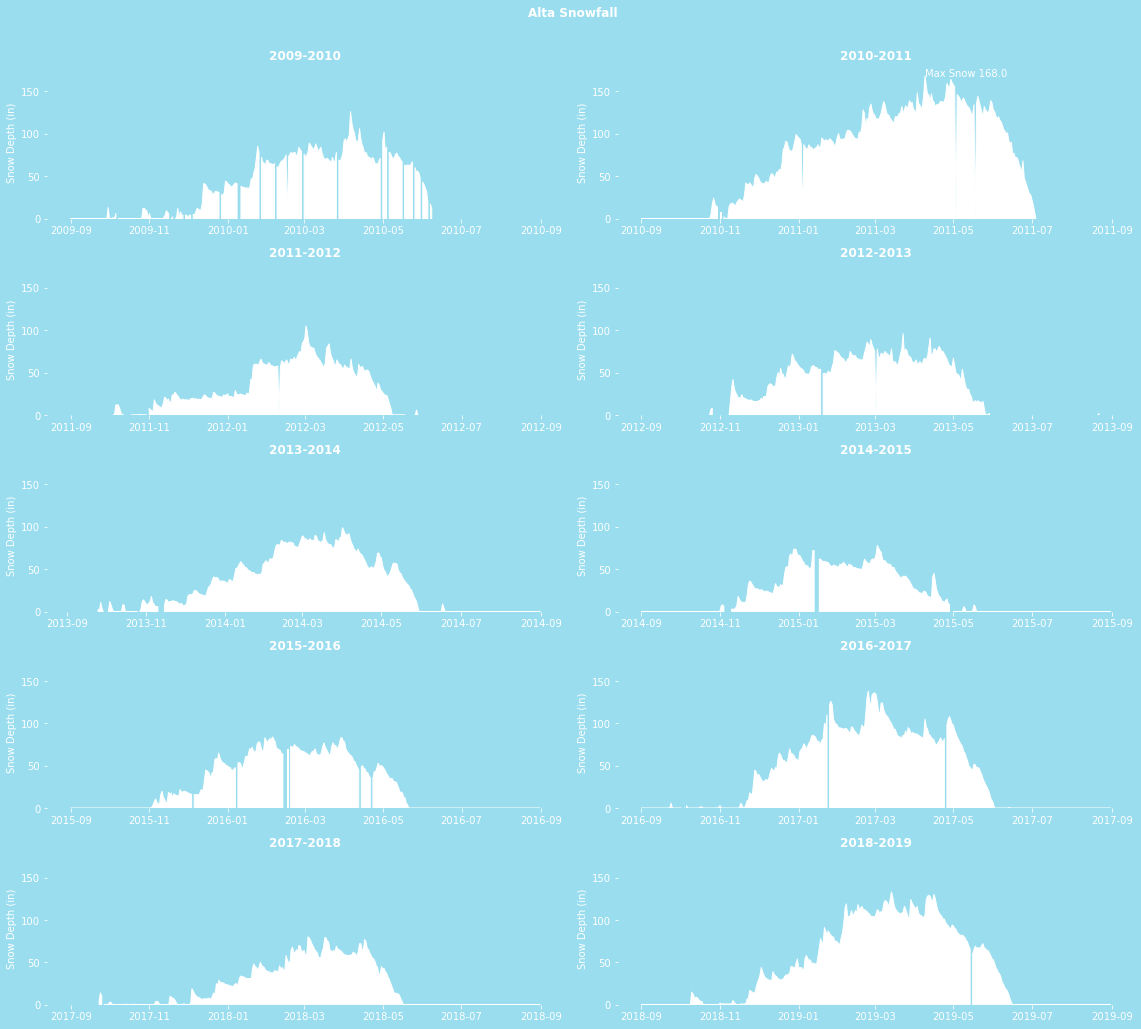

In [23]:
# set years
years = range(2009, 2019)

# set figures and axes
fig, axs = plt.subplots(ncols=2, nrows=int(len(years)/2), 
    figsize=(16, 15), linewidth=5, facecolor=blue)
axs = axs.flatten() # means all axes are in one list not array structure

# set initial max value, max data, max ax values (used to set max value)
max_val = None
max_data = None
max_ax = None

# loop through
for i,year in enumerate(years):
    # select correct axes
    ax = axs[i]
    # filter for correct season
    data = (alta
       .assign(DATE=pd.to_datetime(alta.DATE))
       .set_index('DATE')
       .loc[f'{year}-09':f'{year+1}-08']
       .SNWD
    )
    # adjust max values
    if max_val is None or max_val < data.max():
        max_val = data.max()
        max_data = data
        max_ax = ax
    ax.set_ylim(0, 180)
    year_range = f'{year}-{year+1}'
    plot_year(ax, data, year_range)
    
max_ax.annotate(
    f'Max Snow {max_val}', 
    xy=(mdt.date2num(max_data.idxmax()), max_val), # mdt.date2num - used to get x coordinate for datetime
    color=white
) # gives max snow (2010-2011)

# set title
fig.suptitle('Alta Snowfall', color=white, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
# fig.savefig('c13-alta2.png', dpi=300, facecolor=blue)  

In [28]:
mdt.date2num(max_data.idxmax())
max_data.idxmax()
# mdt.date2num(max_data.idxmax()), max_val

Timestamp('2011-04-09 00:00:00')

### Example 2: Filling in missing data

Load data

In [29]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdt
alta = pd.read_csv('data/alta-noaa-1980-2019.csv')
alta.head(3)

define functions needed

In [ ]:
def plot_year(ax, data, years):
    ax.set_facecolor(blue)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis='x', colors=white)
    ax.tick_params(axis='y', colors=white)
    ax.set_ylabel('Snow Depth (in)', color=white)
    ax.set_title(years, color=white, fontweight='bold')
    ax.fill_between(data.index, data, color=white)

def fix_gaps(ser, threshold=50):
    'Replace values where the shift is > threshold with nan'
    mask = (ser
       .to_frame()
       .assign(next=lambda df_:df_.SNWD.shift(-1),
               snwd_diff=lambda df_:df_.next-df_.SNWD)
       .pipe(lambda df_: df_.snwd_diff.abs() > threshold)
    )
    return ser.where(~mask, np.nan) 

Same as example 1 but we are identifying where the data drops too much (data issue) and so we replace these data points with nan and then interpolate the data back in

Text(734236.0, 168.0, 'Max Snow 168.0')

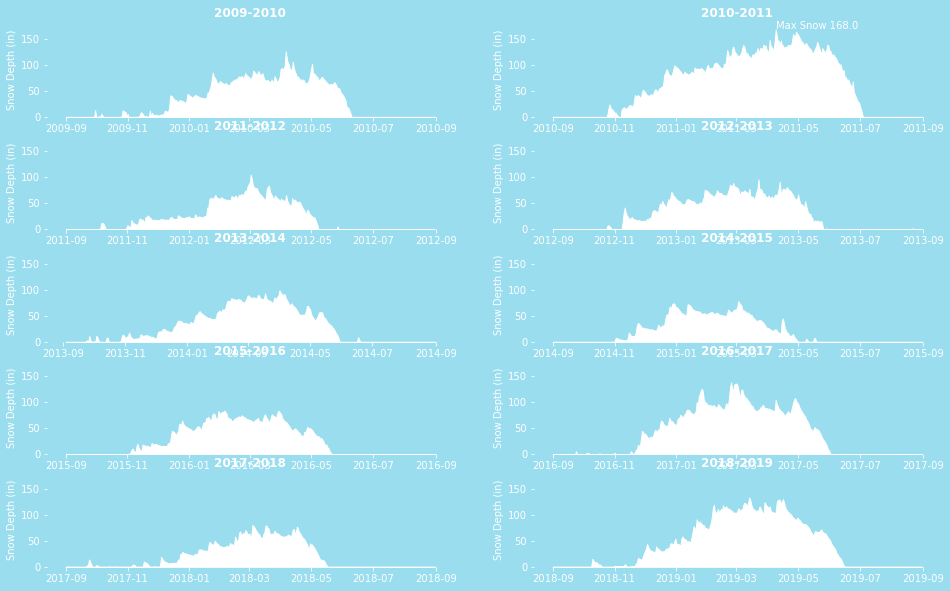

In [30]:
years = range(2009, 2019)
fig, axs = plt.subplots(ncols=2, nrows=int(len(years)/2), 
    figsize=(16, 10), linewidth=5, facecolor=blue)
axs = axs.flatten()
max_val = None
max_data = None
max_ax = None

for i,y in enumerate(years):
    ax = axs[i]
    data = (alta.assign(DATE=pd.to_datetime(alta.DATE))
       .set_index('DATE')
       .loc[f'{y}-09':f'{y+1}-08']
       .SNWD
       .pipe(fix_gaps) # filling gaps with nan
       .interpolate() # interpolate
    )
    if max_val is None or max_val < data.max():
        max_val = data.max()
        max_data = data
        max_ax = ax
    ax.set_ylim(0, 180)
    years = f'{y}-{y+1}'
    plot_year(ax, data, years)
    
max_ax.annotate(f'Max Snow {max_val}', 
   xy=(mdt.date2num(max_data.idxmax()), max_val), 
   color=white)

# Properties of each plotting object 
Example for x axis

{'agg_filter': None,
 'alpha': None,
 'animated': False,
 'children': [Text(0.5, 0, ''),
  Text(1, 0, ''),
 'clip_box': <matplotlib.transforms.TransformedBbox at 0x1d4f8629d90>,
 'clip_on': True,
 'clip_path': None,
 'contains': None,
 'data_interval': array([ inf, -inf]),
 'figure': <Figure size 432x288 with 1 Axes>,
 'gid': None,
 'gridlines': <a list of 6 Line2D gridline objects>,
 'in_layout': True,
 'inverted': False,
 'label': Text(0.5, 0, ''),
 'label_position': 'bottom',
 'label_text': '',
 'major_formatter': <matplotlib.ticker.ScalarFormatter at 0x1d4f85e7fa0>,
 'major_locator': <matplotlib.ticker.AutoLocator at 0x1d4f8892ca0>,
 'major_ticks': [<matplotlib.axis.XTick at 0x1d4f85e51f0>,
 'majorticklabels': <a list of 6 Text major ticklabel objects>,
 'majorticklines': <a list of 12 Line2D ticklines objects>,
 'majorticklocs': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 'minor_formatter': <matplotlib.ticker.NullFormatter at 0x1d4f859c5e0>,
 'minor_locator': <matplotlib.ticker.NullLo

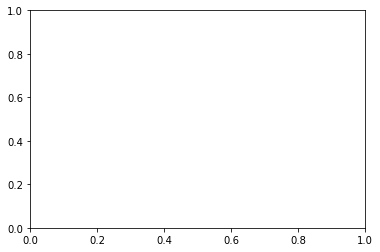

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.xaxis.properties()

# Extra arguments with plotting

In [ ]:
fc.plot.line(figsize=(12,6), title='Flights per Week', grid=True) # grid

(flights # log
    .assign(DELAYED=flights['ARR_DELAY'].ge(15).astype(int),
            ON_TIME=lambda df_:1 - df_[cols].any(axis=1))
    [['DIVERTED', 'CANCELLED', 'DELAYED', 'ON_TIME']]
    .sum()
    .plot.bar(ax=ax4, rot=0,
         log=True, title='Flight Status')
)


(flights # rot
    ['ORG_AIR']
    .value_counts()
    .plot.bar(ax=ax2, rot=0, title='Origin City')
)

flights['DIST'].plot.kde(ax=ax5, xlim=(0, 3000), # xlim, note don't use xlim for histograms and use range=(,) instead
    title='Distance KDE')

alpha=.1 # Show overlapping points

s=1 # to reduce scale


# Extra methods to set objects in matplotlib

In [ ]:
plt.setp(ax.get_xticklabels(), y=.1) # setting ticks to inside of the graph
plt.setp(ax.get_xticklines(), visible=False) # get rid of x axis tick lines

# Accessing plot objects with getter methods or attributes of another object

In [ ]:
# set figure and axes'
fig, axs = plt.subplots(2, 4)
#set example axes
ax = axs[0][0] 

# axes are the same
fig.axes == fig.get_axes()

# axis for example axes is the same
ax.xaxis == ax.get_xaxis()
ax.yaxis == ax.get_yaxis()

# Basic plots

### Example 1: Line plot

Text(0.5, 1.03, 'Figure Title')

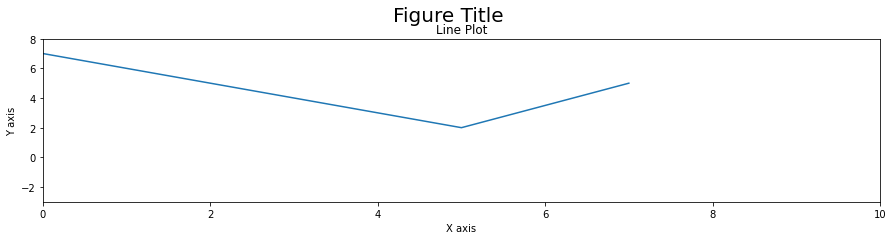

In [4]:
x = [-3, 5, 7]
y = [10, 2, 5]

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(x, y)
ax.set(xlim=(0, 10), ylim=(-3, 8),
    xlabel='X axis', ylabel='Y axis',
    title='Line Plot')
fig.suptitle('Figure Title', size=20, y=1.03)

### Example 2: Plotting line plot with pandas

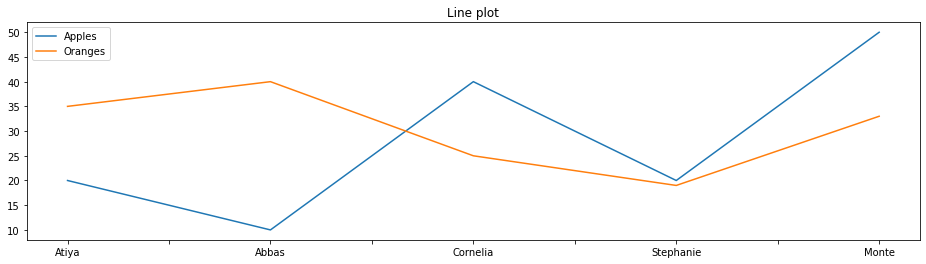

In [34]:
df = pd.DataFrame(index=['Atiya', 'Abbas', 'Cornelia',
    'Stephanie', 'Monte'],
    data={'Apples':[20, 10, 40, 20, 50],
          'Oranges':[35, 40, 25, 19, 33]})

fig, ax1 = plt.subplots(1, 1, figsize=(16,4))
df.plot.line(ax=ax1, title='Line plot')

### Example 3: Pandas plots - two variables - Line plot, scatterplot, bar plot

Line plot: x axis - index, y axis each column

scatterplot: specify x and y (each a column)

bar plot: x axis - index, y axis each column

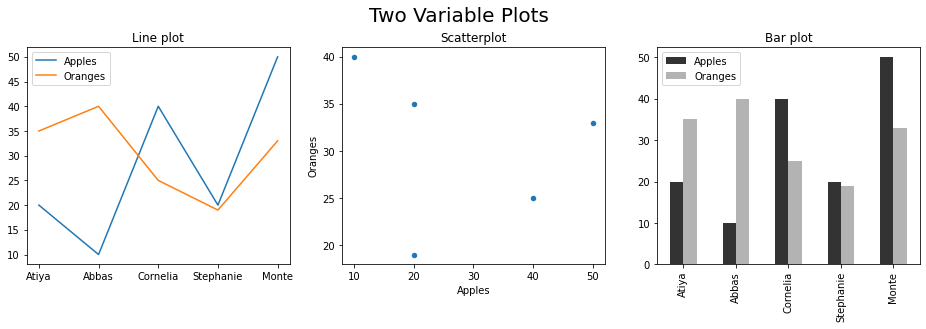

In [36]:
# data
df = pd.DataFrame(index=['Atiya', 'Abbas', 'Cornelia',
    'Stephanie', 'Monte'],
    data={'Apples':[20, 10, 40, 20, 50],
          'Oranges':[35, 40, 25, 19, 33]})

# plotting

color = ['.2', '.7']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))

fig.suptitle('Two Variable Plots', size=20, y=1.02)

df.plot.line(ax=ax1, title='Line plot')
df.plot.scatter(x='Apples', y='Oranges', 
    ax=ax2, title='Scatterplot')
df.plot.bar(color=color, ax=ax3, title='Bar plot')

# fig.savefig('c13-pdemo-scat.png', dpi=300, bbox_inches='tight')

Above showed call columns sketched but if we only want one then we do below

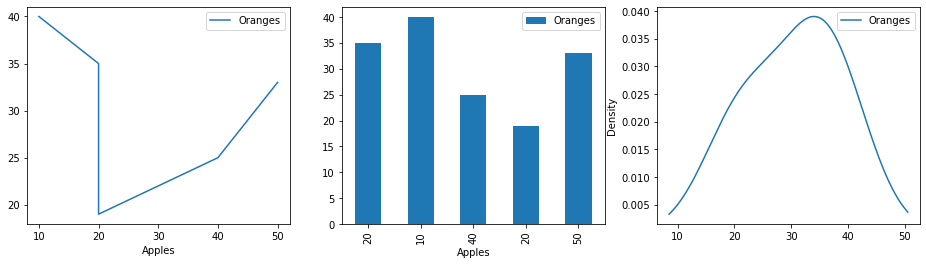

In [39]:
# data
df = pd.DataFrame(index=['Atiya', 'Abbas', 'Cornelia',
    'Stephanie', 'Monte'],
    data={'Apples':[20, 10, 40, 20, 50],
          'Oranges':[35, 40, 25, 19, 33]})

# plotting

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
df.sort_values('Apples').plot.line(x='Apples', y='Oranges',
      ax=ax1)
df.plot.bar(x='Apples', y='Oranges', ax=ax2)
df.plot.kde(x='Apples', ax=ax3)
# fig.savefig('c13-pdemo-kde3.png', dpi=300, bbox_inches='tight')

### Example 4: Pandas plots - one variables - KDE plot, box plot, histogram plot

* kde plot: each column is a line (ignores index)
* boxplot: each column
* histogram: each column

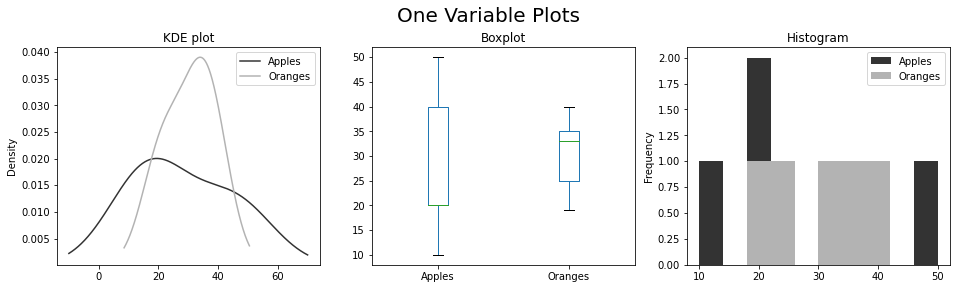

In [37]:
color = ['.2', '.7']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
fig.suptitle('One Variable Plots', size=20, y=1.02)
df.plot.kde(color=color, ax=ax1, title='KDE plot')
df.plot.box(ax=ax2, title='Boxplot')
df.plot.hist(color=color, ax=ax3, title='Histogram')
fig.savefig('c13-pdemo-kde2.png', dpi=300, bbox_inches='tight')

# Good examples

### Example 1: (Line plot) Plotting number if flights per week and annotating whrere we had missing data

Text(0.5, 1.0, 'Flights per Week (Interpolated Missing Data)')

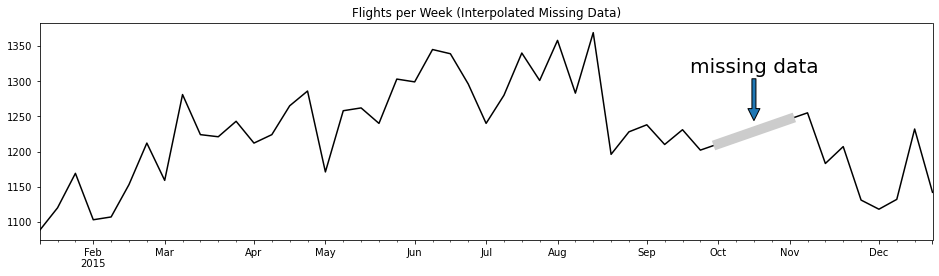

In [5]:
# load data
import pandas as pd
flights = pd.read_csv('data/flights.csv')
flights.head(3)

# get date data for each flight 
df_date = (
    flights
    [['MONTH', 'DAY']]
    .assign(
        YEAR=2015, # giving any year
        HOUR=flights['SCHED_DEP'] // 100, # tiem in format HHMM as an integer
        MINUTE=flights['SCHED_DEP'] % 100
    )
)

# dataframe of the dates for each flight (series)
flight_dep = pd.to_datetime(df_date)

# make flights index of the data of each flight
flights.index = flight_dep

# define function used to filling in missing data
def interp_lt_n(df_, n=600):
    return (df_
        .where(df_ > n)
        .interpolate(limit_direction='both')
)

# set your figure and axes
fig, ax = plt.subplots(figsize=(16,4))

# grab data, NB: requires index to be datetime which is done in steps above
# data here is the number of flights per week
data = (flights
    .resample('W')
    .size()
)

# apply interpolate function to weekly flights data
(data
    .pipe(interp_lt_n)
    .iloc[1:-1]
    .plot.line(color='black', ax=ax)
)
mask = data<600
(data
     .pipe(interp_lt_n)
     [mask]
     .plot.line(color='.8', linewidth=10)
) 
ax.annotate(xy=(.8, .55), xytext=(.8, .77),
            xycoords='axes fraction', s='missing data',
            ha='center', size=20, arrowprops=dict())
ax.set_title('Flights per Week (Interpolated Missing Data)')
# fig.savefig('c13-ts2.png')

Now we have replaced the missing data, abot shows that summar months has a lot more air traffic.

### Example 2: Scatter plot for distance and airtime for flights below 2,000 miles

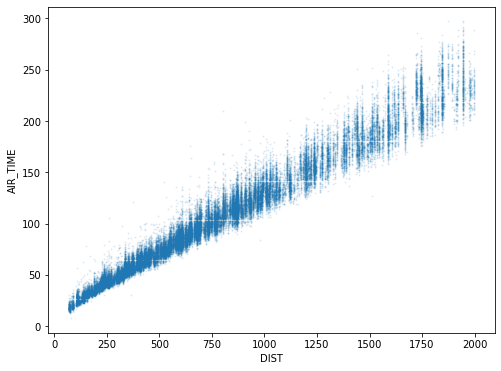

In [3]:
# load data
import pandas as pd
flights = pd.read_csv('data/flights.csv')
flights.head(3)

# plot
fig, ax = plt.subplots(figsize=(8,6))
(flights
    .reset_index(drop=True)
    [['DIST', 'AIR_TIME']] 
    .query('DIST <= 2000')
    .dropna()
    .plot.scatter(x='DIST', y='AIR_TIME', ax=ax, alpha=.1, s=1)
)

Appears a tight linear relationship between distance and airtime but variance increases as number of miles increases. Let's have a look at the correlation

### Example 3: Area plot to show the percentage of new comers joing each respective group
(grouped by new members per group per week)

Text(0.86, 0.78, 'Machine Learning')

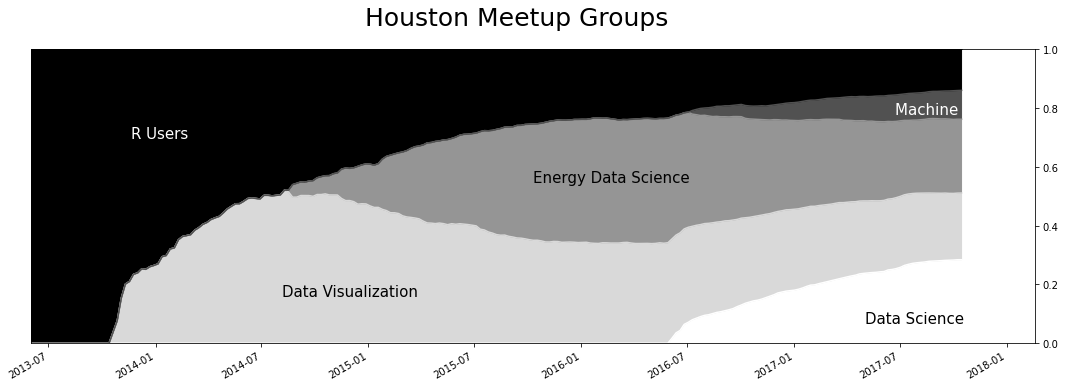

In [6]:
# set figure and axes
fig, ax = plt.subplots(figsize=(18,6))  

# plot of area plot
(meetup
    .groupby([pd.Grouper(freq='W'), 'group']) 
    .size()
    .unstack('group', fill_value=0)
    .cumsum()
    .pipe(lambda df_: df_.div(
          df_.sum(axis='columns'), axis='index'))
    .plot.area(ax=ax,
          cmap='Greys', xlim=('2013-6', None), # note done x lim with datetime string, can't do that in matplotlib
          ylim=(0, 1), legend=False)
)

#main title
ax.figure.suptitle('Houston Meetup Groups', size=25)
# no x axis label
ax.set_xlabel('')
# y ticks on right
ax.yaxis.tick_right()

kwargs = {'xycoords':'axes fraction', 'size':15}

# annotate areas
ax.annotate(xy=(.1, .7), s='R Users',
    color='w', **kwargs)
ax.annotate(xy=(.25, .16), s='Data Visualization',
    color='k', **kwargs)
ax.annotate(xy=(.5, .55), s='Energy Data Science',
    color='k', **kwargs)
ax.annotate(xy=(.83, .07), s='Data Science',
    color='k', **kwargs)
ax.annotate(xy=(.86, .78), s='Machine Learning',
    color='w', **kwargs)
# fig.savefig('c13-stacked1.png')

# Seaborn

### Barplot

Average salary for each race with seaborn

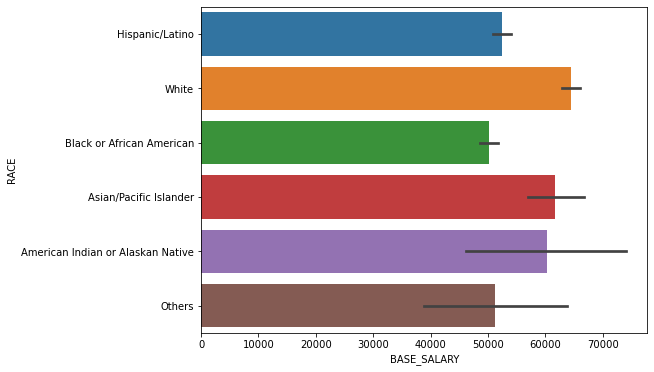

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))    

sns.barplot(y='RACE', x='BASE_SALARY', data=employee, ax=ax) # horizontal plot

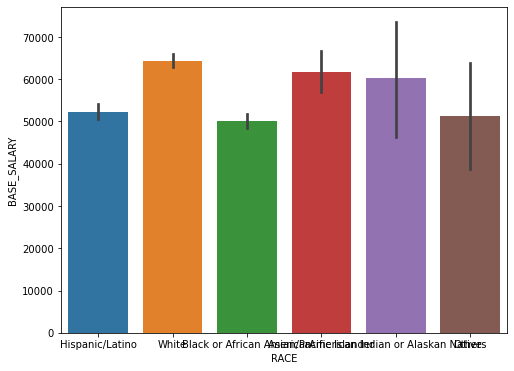

In [11]:
fig, ax = plt.subplots(figsize=(8, 6)) 

sns.barplot( y='BASE_SALARY', x='RACE', data=employee, ax=ax) # vertical bar plot

In [ ]:
### pandas way

# fig, ax = plt.subplots(figsize=(8, 6))    

# (employee
#     .groupby('RACE', sort=False) 
#     ['BASE_SALARY']
#     .mean()
#     .plot.barh(rot=0, width=.8, ax=ax)
# )
# ax.set_xlabel('Mean Salary')

Showing two splits in data for bar plots, gender and race

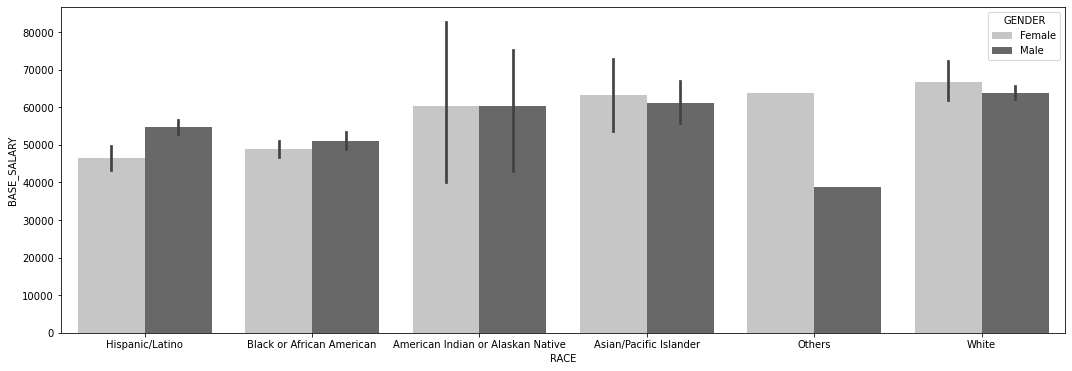

In [11]:
fig, ax = plt.subplots(figsize=(18, 6))   

sns.barplot(x='RACE', y='BASE_SALARY', hue='GENDER',
    ax=ax, data=employee, palette='Greys',
    order=['Hispanic/Latino', 
           'Black or African American',
           'American Indian or Alaskan Native',
           'Asian/Pacific Islander', 'Others',
           'White'])

In [ ]:
# pandas way
fig, ax = plt.subplots(figsize=(18, 6))            
(employee
    .groupby(['RACE', 'GENDER'], sort=False) 
    ['BASE_SALARY']
    .mean()
    .unstack('GENDER')
    .sort_values('Female')
    .plot.bar(rot=0, ax=ax,
        width=.8, cmap='viridis')
)

### Boxplots

box plots for gender and race

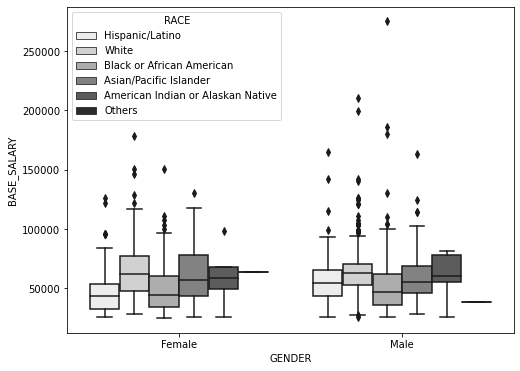

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))   

sns.boxplot(x='GENDER', y='BASE_SALARY', data=employee,
            hue='RACE', palette='Greys', ax=ax)
# fig.savefig('c13-sns7.png', dpi=300, bbox_inches='tight')

In [ ]:
### pandas way

# fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
# for g, ax in zip(['Female', 'Male'], axs):
#     (employee
#         .query('GENDER == @g')
#         .assign(RACE=lambda df_:df_.RACE.fillna('NA'))
#         .pivot(columns='RACE')
#         ['BASE_SALARY']
#         .plot.box(ax=ax, rot=30)
#     )
#     ax.set_title(g + ' Salary')
#     ax.set_xlabel('')
# # fig.savefig('c13-sns8.png', bbox_inches='tight')

## Catplot

Example: boxplot in seaborn for category data

In [3]:
mask = fueleco.make.isin(['Ford', 'Honda', 'Tesla', 'BMW'])
fueleco[mask].groupby('make').city08.agg(['mean', 'std'])

,mean,std
make,,
BMW,17.817377,7.372907
Ford,16.853803,6.701029
Honda,24.372973,9.154064
Tesla,92.826087,5.538970


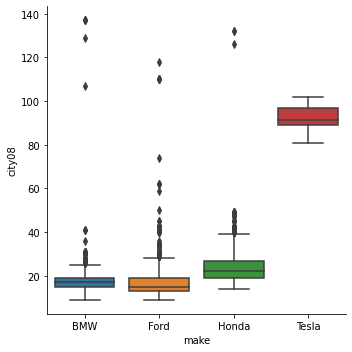

In [4]:
g = sns.catplot(x='make', y='city08', 
  data=fueleco[mask], kind='box')

### Countplot

Count of each department

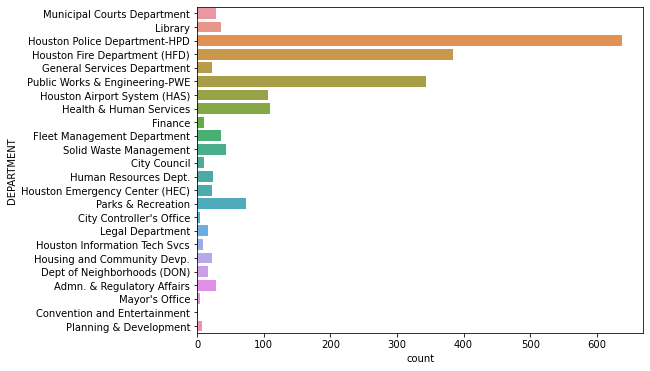

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(y='DEPARTMENT', data=employee, ax=ax)

In [ ]:
### pandas way
# fig, ax = plt.subplots(figsize=(8, 6))

# (employee
#     ['DEPARTMENT']
#     .value_counts()
#     .plot.barh(ax=ax)
# )

### Heatmap

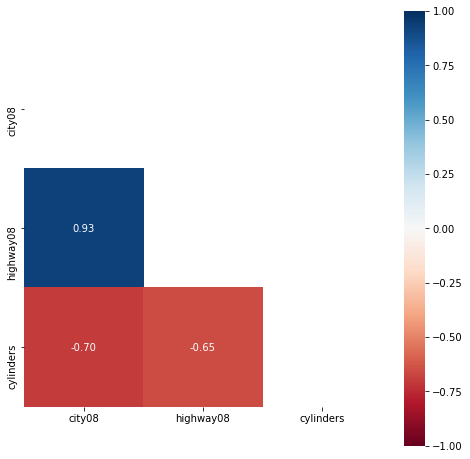

In [9]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,8))
corr = fueleco[['city08', 'highway08', 'cylinders']].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask,
    fmt='.2f', annot=True, ax=ax, cmap='RdBu', vmin=-1, vmax=1,
    square=True)

### Relplots

plotting four dimension graph, where color is the year and size the number of barrels the vehicle consumes.

NB using relplot (seaborn) and not scatterplot

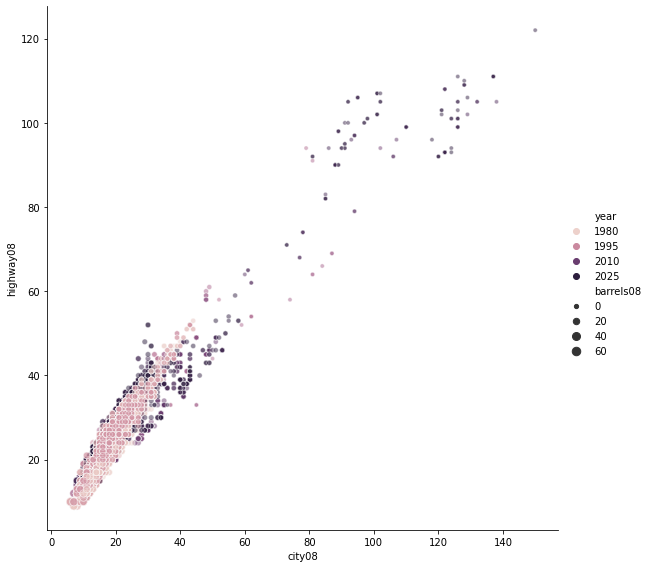

In [5]:
res = sns.relplot(
    x='city08', y='highway08',
    data=fueleco.assign(
       cylinders=fueleco.cylinders.fillna(0)),
    hue='year',
    size='barrels08', 
    alpha=.5, 
    height=8)

In [7]:
Adding categorical dimension to above plot (hue) for the make of the vechicle.

SyntaxError: invalid syntax (<ipython-input-7-9802f512b904>, line 1)

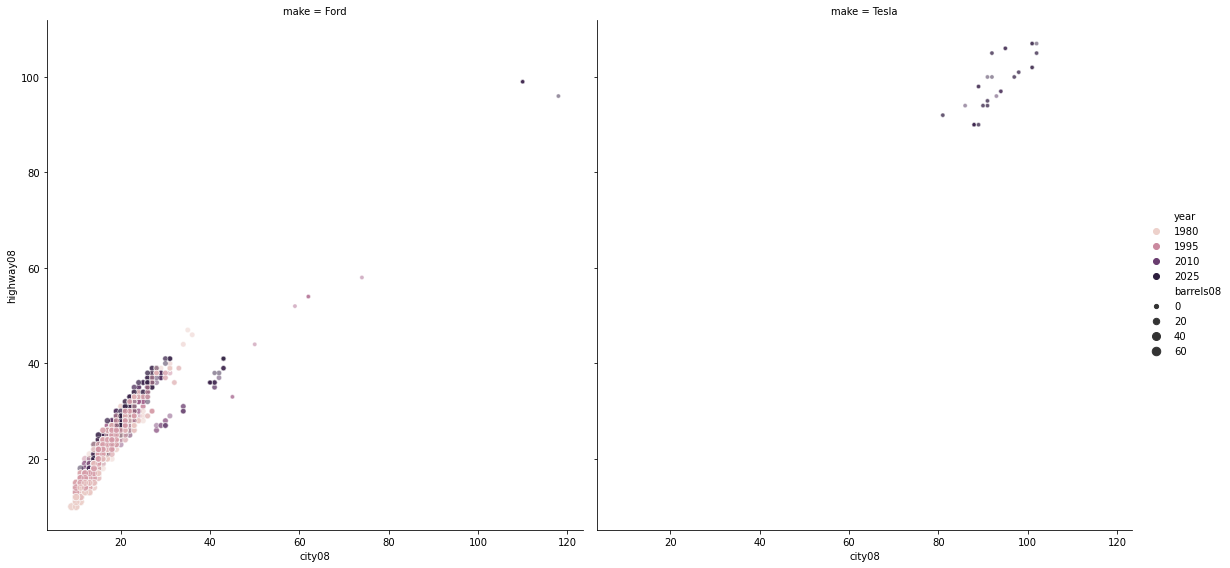

In [6]:
res = sns.relplot(x='city08', y='highway08',
  data=fueleco.assign(
  cylinders=fueleco.cylinders.fillna(0)),
  hue='year', size='barrels08', alpha=.5, height=8,
  col='make', col_order=['Ford', 'Tesla'])

### Scatterplot with regression line

Plot to show relationnship between years of experience and salary

In [13]:
# load data
emp = pd.read_csv('data/employee.csv',
    parse_dates=['HIRE_DATE', 'JOB_DATE'])

# function
def yrs_exp(df_):
    days_hired = pd.to_datetime('12-1-2016') - df_.HIRE_DATE # dates minus each other returns a time delta object units in days
    return days_hired.dt.days / 365.25

# add years of experience into df
emp = (emp
    .assign(YEARS_EXPERIENCE=yrs_exp)
)

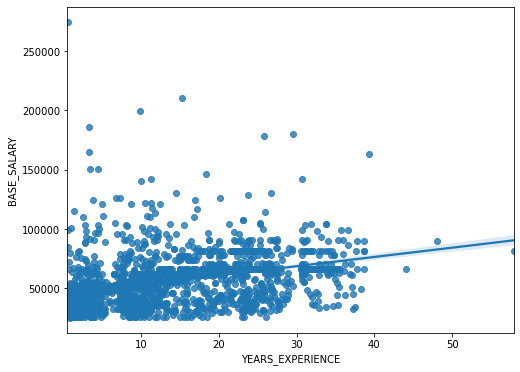

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))   

sns.regplot(x='YEARS_EXPERIENCE', y='BASE_SALARY',
    data=emp, ax=ax)

regplot can't plot multiple regression linesm use lmplot to plot a seaborn grid that adds regression lies for male and females

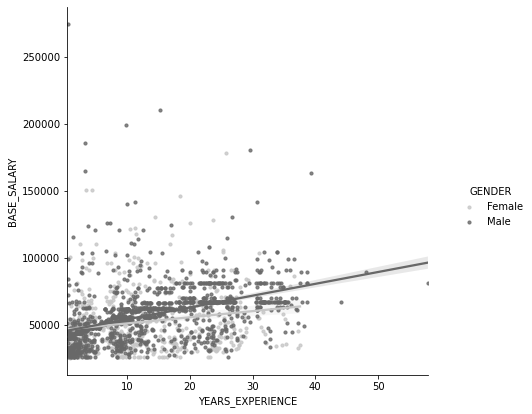

In [19]:
grid = sns.lmplot(x='YEARS_EXPERIENCE', y='BASE_SALARY', 
    hue='GENDER', palette='Greys',
    scatter_kws={'s':10}, data=emp) # scatter kws are the scatter point sizes

grid.fig.set_size_inches(8, 6) # set fig size

Plot for each unique race the plots for years of experience and pay for males and females

In [ ]:
grid = sns.lmplot(
    x='YEARS_EXPERIENCE', y='BASE_SALARY',
    hue='GENDER', 
    col='RACE', 
    col_wrap=3,
    palette='Greys', 
    sharex=False,
    line_kws = {'linewidth':5}, 
    data=emp)
# there are also parameters from the 'line' and 'scatter' plot functions from matplotlib
# to do so set the 'scatter_kws' and 'line_kws' parameters to a dictionary that has the matplotlib parameter as a
# key paired with the value

grid.set(ylim=(20000, 120000)) 

### Seaborn grid

(above shows similar use case)

Example: plotting distribution of yrs of experience with gender (Categorical data)

In [21]:
deps = emp['DEPARTMENT'].value_counts().index[:2]
races = emp['RACE'].value_counts().index[:3]
is_dep = emp['DEPARTMENT'].isin(deps)
is_race = emp['RACE'].isin(races)    
emp2 = (emp
    [is_dep & is_race]
    .assign(DEPARTMENT=lambda df_:
            df_['DEPARTMENT'].str.extract('(HPD|HFD)',
                                    expand=True))
)

In [22]:
# shape
print( emp2.shape)

(968, 11)


In [24]:
# value counts for department
emp2['DEPARTMENT'].value_counts()

HPD    591
HFD    377
Name: DEPARTMENT, dtype: int64

In [25]:
emp2['RACE'].value_counts()

White                        478
Hispanic/Latino              250
Black or African American    240
Name: RACE, dtype: int64

In [26]:
common_depts = (emp
    .groupby('DEPARTMENT') 
    .filter(lambda group: len(group) > 50)
)

violin plot for years of experience for genders

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))   
sns.violinplot(x='YEARS_EXPERIENCE', y='GENDER',
    data=common_depts)

can use catplot to do viloin plot for combinations of department and race

In [ ]:
grid = sns.catplot(x='YEARS_EXPERIENCE', y='GENDER',
                      col='RACE', row='DEPARTMENT',
                      height=3, aspect=2,
                      data=emp2, kind='violin')

### Seaborn pairgrid

Pair grid can be used to plot bivariate relationships.

using paurgrid is a two step process:
1. Call the constructor and alert it to which variables will be x and which will be y
2. calls the .map method to apply a plot to all of the combinations of x and y columns

In [4]:
# clean data
cut_cats = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_cats = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_cats = ['I1', 'SI2', 'SI1', 'VS2',
                'VS1', 'VVS2', 'VVS1', 'IF']

# applying ordering and putting columns into categories
# creating categorical columns
# nb seaborn uses categroy orders for plots)
dia2 = (dia
    .assign(cut=pd.Categorical(dia['cut'], 
                 categories=cut_cats,
                 ordered=True),
            color=pd.Categorical(dia['color'], 
                 categories=color_cats,
                 ordered=True),
            clarity=pd.Categorical(dia['clarity'], 
                 categories=clarity_cats,
                 ordered=True))
)

Text(0.5, 1.02, 'Replication of Step 3 with PairGrid')

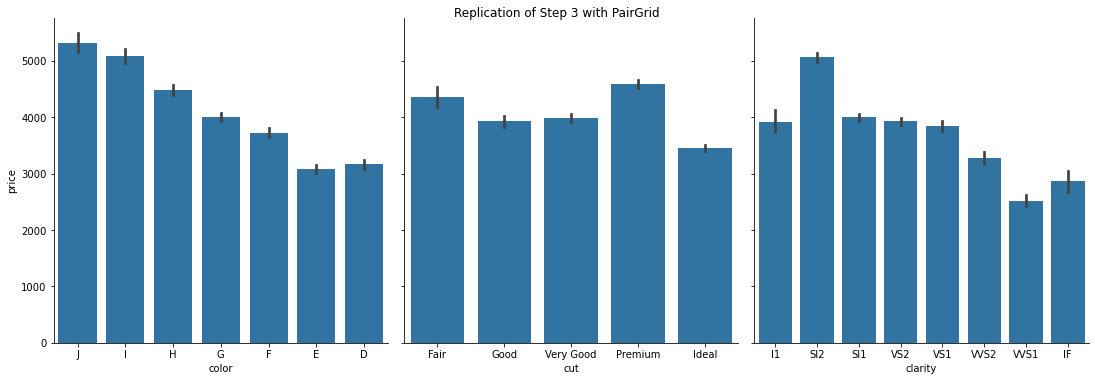

In [5]:
g = sns.PairGrid(dia2, height=5,
    x_vars=["color", "cut", "clarity"],
    y_vars=["price"])
g.map(sns.barplot)
g.fig.suptitle('Replication of Step 3 with PairGrid', y=1.02)
# g.fig.savefig('c13-bar8.png', dpi=300, bbox_inches='tight')

### swarmplot

Plot to show all boxplots don't have the same number of samples per box.

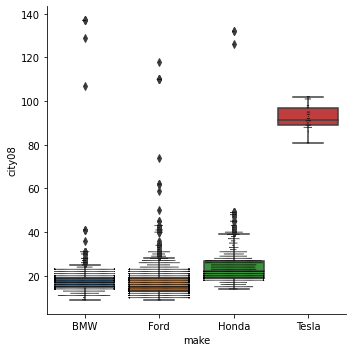

In [5]:
# mask
mask = fueleco.make.isin(['Ford', 'Honda', 'Tesla', 'BMW'])

# cat plot
g = sns.catplot(x='make', y='city08', 
  data=fueleco[mask], kind='box')

# swarmplot
sns.swarmplot(x='make', y='city08',    # doctest: +SKIP
  data=fueleco[mask], color='k', size=1, ax=g.ax)

# Seaborn good examples

### Example: Uncovering Simpson's Paradox in the diamonds dataset with seaborn

Turn columns into categorical columns

In [29]:
cut_cats = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_cats = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_cats = ['I1', 'SI2', 'SI1', 'VS2',
                'VS1', 'VVS2', 'VVS1', 'IF']

# applying ordering and putting columns into categories
# creating categorical columns
# nb seaborn uses categroy orders for plots)
dia2 = (dia
    .assign(cut=pd.Categorical(dia['cut'], 
                 categories=cut_cats,
                 ordered=True),
            color=pd.Categorical(dia['color'], 
                 categories=color_cats,
                 ordered=True),
            clarity=pd.Categorical(dia['clarity'], 
                 categories=clarity_cats,
                 ordered=True))
)

Barplots of price based on colour, cut and clarity

Text(0.5, 0.98, 'Price Decreasing with Increasing Quality?')

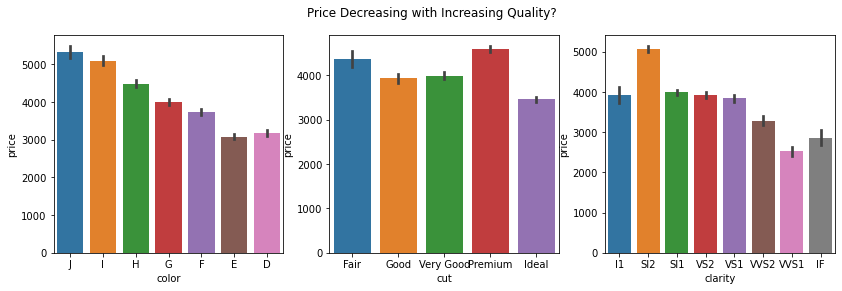

In [30]:
import seaborn as sns

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))

sns.barplot(x='color', y='price', data=dia2, ax=ax1)
sns.barplot(x='cut', y='price', data=dia2, ax=ax2)
sns.barplot(x='clarity', y='price', data=dia2, ax=ax3)
fig.suptitle('Price Decreasing with Increasing Quality?')

Above suggested decreasing trend for color and price. The highest quality cuts and clarity levels also have low prices which doesn't make sense.

Plot barplots of price and color but each clarity level will be plotted

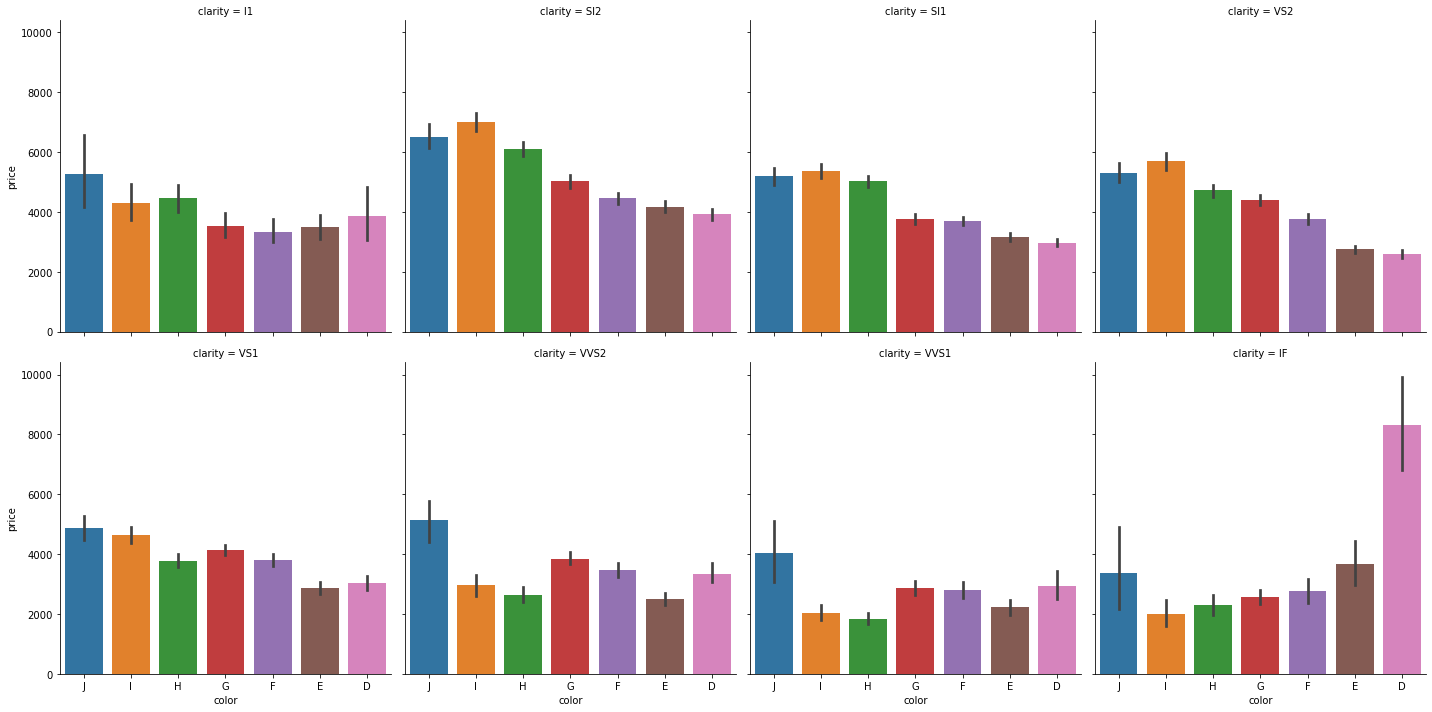

In [31]:
grid = sns.catplot(x='color', y='price', col='clarity',
    col_wrap=4, data=dia2, kind='bar')

Above is better as although price appears to decrease as quality of color increases, doesn not happen with clarity.

Make more plots with size fo diamond to be considered as well

Text(0.5, 0.98, 'Diamond size decreases with quality')

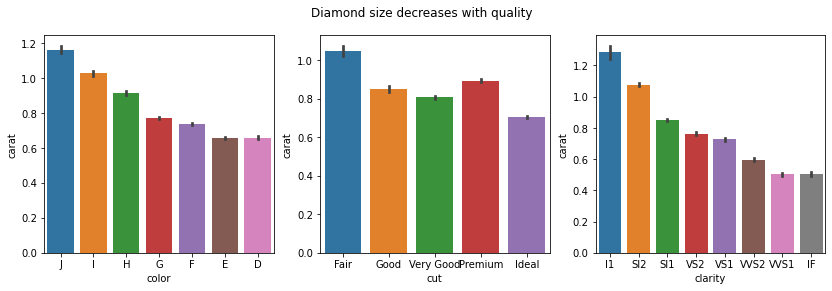

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))

sns.barplot(x='color', y='carat', data=dia2, ax=ax1)
sns.barplot(x='cut', y='carat', data=dia2, ax=ax2)
sns.barplot(x='clarity', y='carat', data=dia2, ax=ax3)

fig.suptitle('Diamond size decreases with quality')

So above shows higher quality diamonds appear to be smaller in size which makes sense.

Now plot so that we have five different lines for each carat value.

The plot should show higher quality diamonds do in fact cost more money based on size
(plotting mean price per diamond size per group)

Text(0.5, 1.02, 'Diamond price by size, color and clarity')

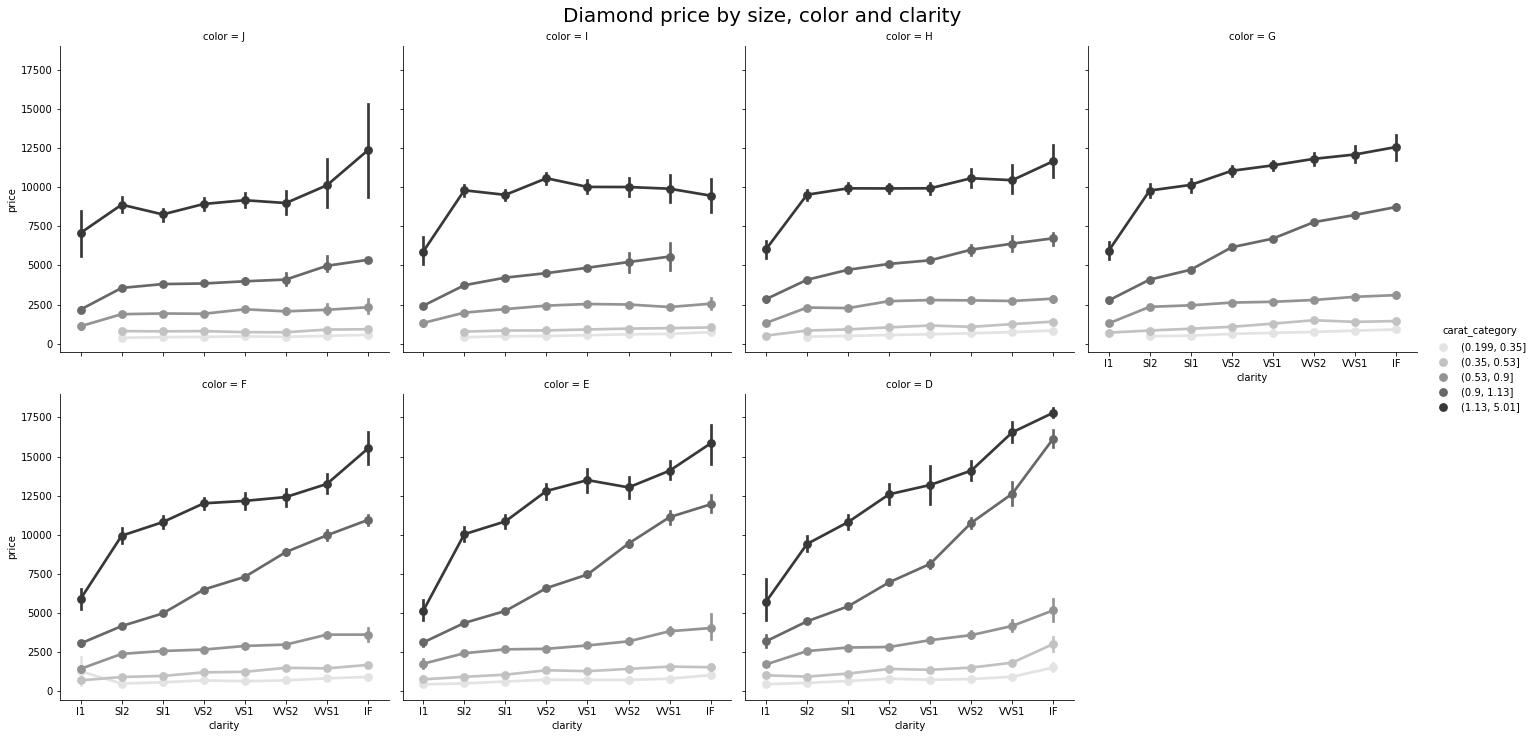

In [36]:
# add carot category (size)
dia2 = (dia2
    .assign(carat_category=pd.qcut(dia2.carat, 5))
)

# grey shades
from matplotlib.cm import Greys
greys = Greys(np.arange(50,250,40))

# catplot
grid = sns.catplot(x='clarity', y='price', data=dia2,
   hue='carat_category', col='color',
   col_wrap=4, kind='point', palette=greys)

# tit;e
grid.fig.suptitle('Diamond price by size, color and clarity',
   y=1.02, size=20)

### Example: Comparing continuous values across categories (Cat plot)

Using col parameter to facet grid by another feature other than make

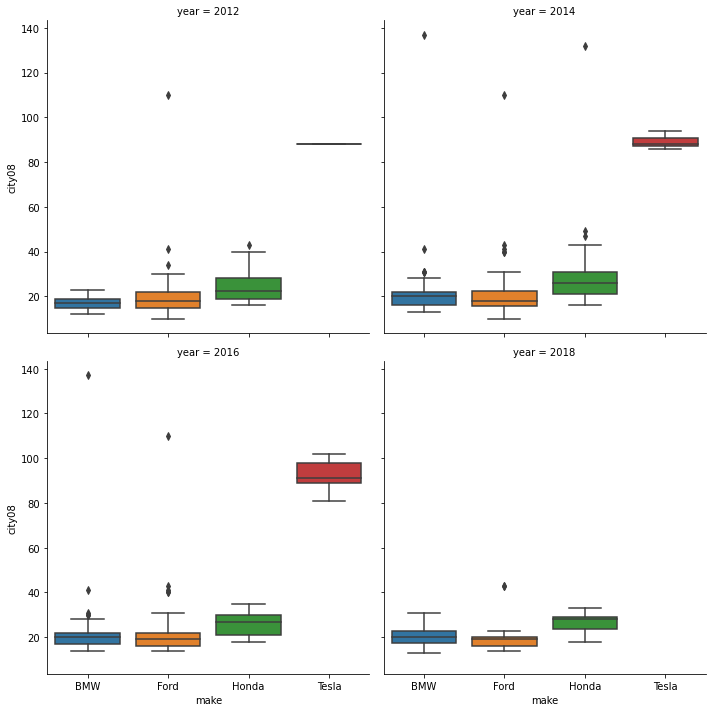

In [6]:
g = sns.catplot(x='make', y='city08', 
  data=fueleco[mask], kind='box',
  col='year', col_order=[2012, 2014, 2016, 2018],
  col_wrap=2)

can embed new dimension by using hue parameter

In [ ]:
g = sns.catplot(x='make', y='city08', # doctest: +SKIP  
  data=fueleco[mask], kind='box',
  hue='year', hue_order=[2012, 2014, 2016, 2018])

highlighting summary statistics

In [8]:
mask = fueleco.make.isin(['Ford', 'Honda', 'Tesla', 'BMW'])
(fueleco
  [mask]
  .groupby('make')
  .city08
  .agg(['mean', 'std'])
  .style.background_gradient(cmap='RdBu', axis=0)
)

,mean,std
make,,
BMW,17.817377,7.372907
Ford,16.853803,6.701029
Honda,24.372973,9.154064
Tesla,92.826087,5.538970


### Example: Showing counts for categorical data

In [9]:
import scipy.stats as ss
import numpy as np

# categorical correlation function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# set data up

# function to generlize vehicle
def generalize(ser, match_name, default):
    seen = None
    for match, name in match_name:
        mask = ser.str.contains(match)
        if seen is None:
            seen = mask
        else:
            seen |= mask
        ser = ser.where(~mask, name)
    ser = ser.where(seen, default)
    return ser

# apply above function
makes = ['Ford', 'Tesla', 'BMW', 'Toyota']
data = (fueleco
   [fueleco.make.isin(makes)]
   .assign(SClass=lambda df_: generalize(df_.VClass,
    [('Seaters', 'Car'), ('Car', 'Car'), ('Utility', 'SUV'),
     ('Truck', 'Truck'), ('Van', 'Van'), ('van', 'Van'),
     ('Wagon', 'Wagon')], 'other'))
)

Visualize cross tabulation table as a bar plot

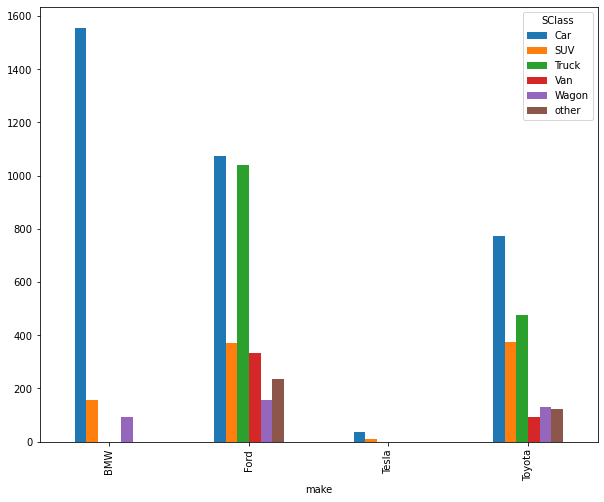

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
(data
 .pipe(lambda df_: pd.crosstab(df_.make, df_.SClass))
 .plot.bar(ax=ax)
)

Visualize cross tabulation table as a bar plot (using seaborn)

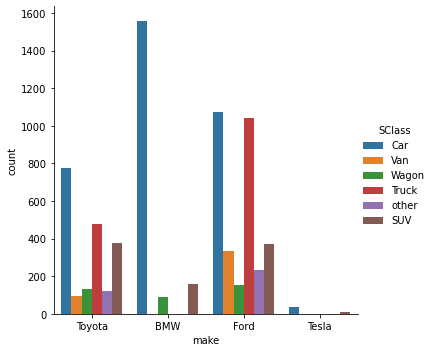

In [12]:
res = sns.catplot(kind='count',
   x='make', hue='SClass', data=data)

Visualize relative size of the groups by normalizing the cross tabulation and making a stacked bar chart

SClass,Car,SUV,Truck,Van,Wagon,other
make,,,,,,
BMW,0.861649,0.087438,0.000000,0.000000,0.050913,0.000000
Ford,0.335100,0.115960,0.324190,0.103491,0.048317,0.072943
Tesla,0.782609,0.217391,0.000000,0.000000,0.000000,0.000000
Toyota,0.391194,0.190283,0.241903,0.047571,0.066802,0.062247


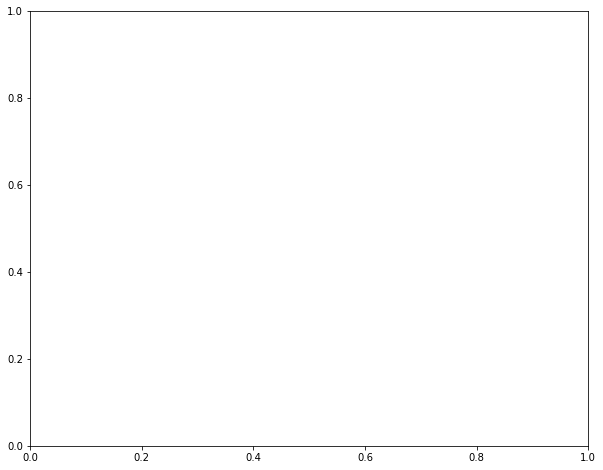

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
(data
 .pipe(lambda df_: pd.crosstab(df_.make, df_.SClass))
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .plot.bar(stacked=True, ax=ax)
)